### Gaussian Transformation


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats


In [23]:
data = pd.read_csv('titanic_data.csv', usecols= ['Age','Fare','Survived'])

In [26]:
data.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
#Checking the missing values
data.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [40]:
df = data.copy()
df['Age'+'num'] = df['Age']

In [46]:
df.loc[df['Age'].isnull(), ]

,Survived,Age,Fare,Agenum
5,0,NaN,8.4583,NaN
17,1,NaN,13.0000,NaN
19,1,NaN,7.2250,NaN
26,0,NaN,7.2250,NaN
28,1,NaN,7.8792,NaN
...,...,...,...,...
859,0,NaN,7.2292,NaN
863,0,NaN,69.5500,NaN
868,0,NaN,9.5000,NaN
878,0,NaN,7.8958,NaN


In [60]:
def random_sample(data, variable):
    #copy the data for the extraction
    df = data.copy()
    
    # Random Sampling
    data[variable+'num'] = data[variable]
    
    
    #Extract the random data to fill the null values
    random_data =  df[variable].dropna().sample(df[variable].isna().sum(), random_state = 0)
    
    # Filling the data, since pandas need the same index to merge the datasets 
    
    random_data.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'num'] = random_data

    
    return df[variable+'num']

In [61]:
data['Age'] = random_sample(data, 'Age')

In [63]:
data.drop(columns = ["Agenum"], inplace = True)

###  Q-Q Plots

In [73]:
def dignostic_plots(df, variable):
    # for ploting the histogram  and the Q- Q plots
    # Side by side for a certain values
    
    plt.figure(figsize= (15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist= 'norm', plot = plt )
    
    plt.show()

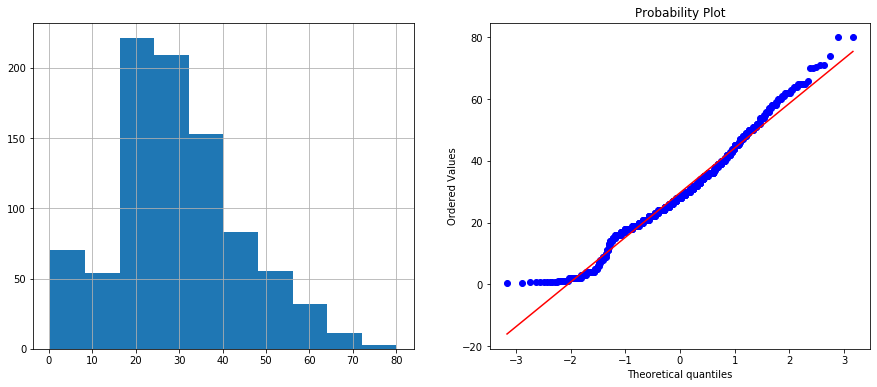

In [74]:
dignostic_plots(data, 'Age')

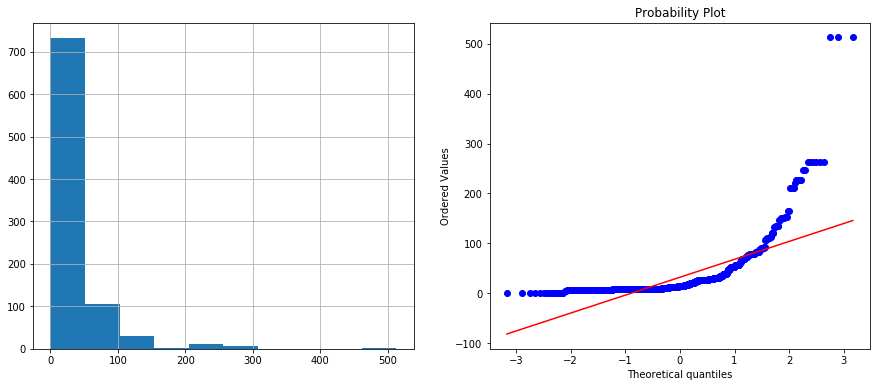

In [75]:
dignostic_plots(data, 'Fare')

### Logarthemic Tranformation

In [78]:
data['Log_fare'] = np.log(data['Fare']+1)

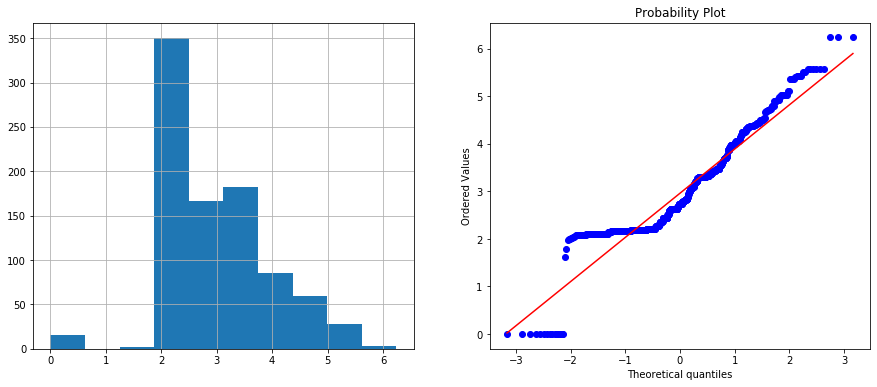

In [79]:
dignostic_plots(data, 'Log_fare')

 Logarthemic Distribution made a good job in making the fare variable look Gaussian distributed

### Reciprocal Distribution

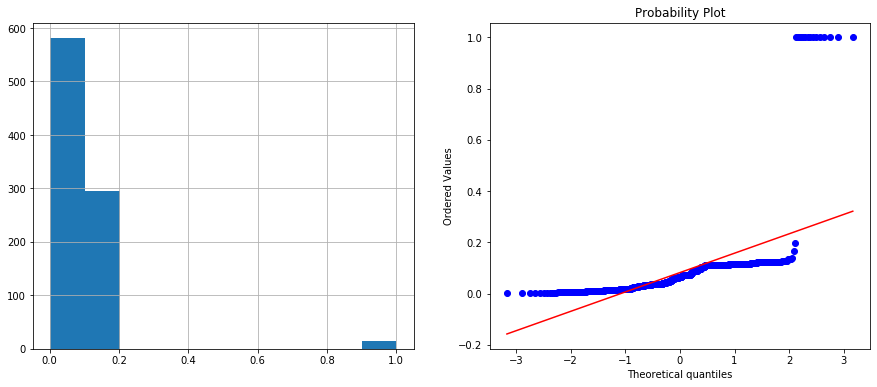

In [81]:

data['Fare_rep'] = 1/(data['Fare']+1)
dignostic_plots(data, 'Fare_rep')

# Box Cox

Optimum lambda: -0.09778702818680361


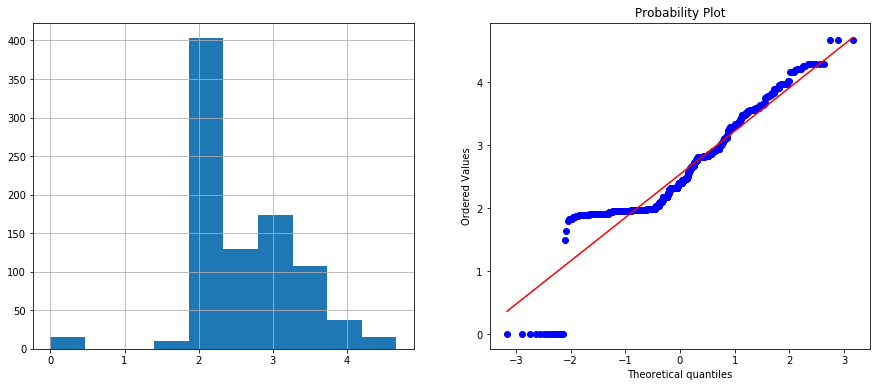

In [88]:
data['Fare_box'], param = stats.boxcox(data.Fare+1) # yOu can vary the exponent needed

print('Optimum lambda:', param)

dignostic_plots(data, 'Fare_box')

### Sqaure Root Transformation

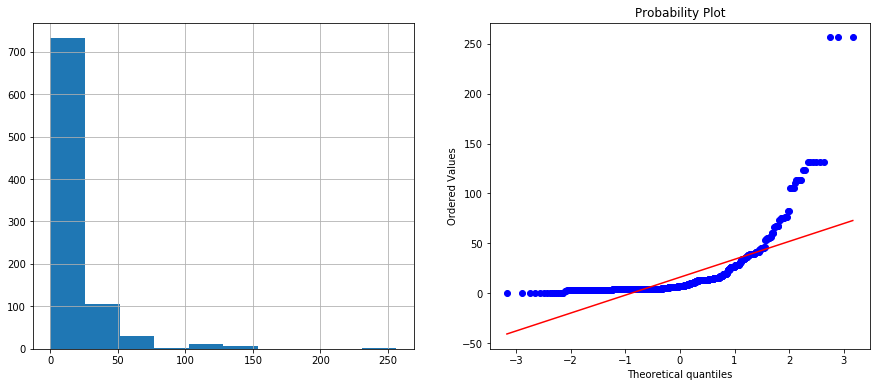

In [89]:
data['Fare_sqrt'] = data['Fare']**1/2
dignostic_plots(data, 'Fare_sqrt')

# Exponential Transformation

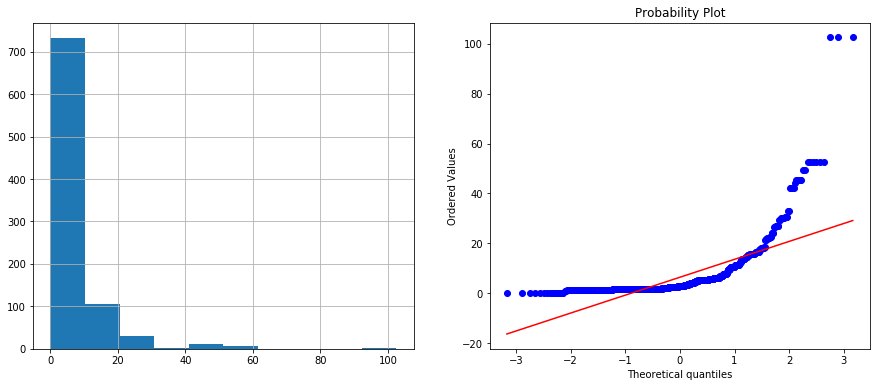

In [90]:
data['Fare_exp'] = data['Fare']**1/5
dignostic_plots(data, 'Fare_exp')